<a href="https://colab.research.google.com/github/remre/StriveSchool-ai/blob/main/m7NLP/d4/notes/NLPDLAIW2Imdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import tensorflow as tf
import os 
from __future__ import absolute_import, division, print_function, unicode_literals
from tensorflow import keras
import zipfile
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.text import Tokenizer
import os
from datetime import datetime
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
imdb, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete0I26JP/imdb_reviews-train.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete0I26JP/imdb_reviews-test.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete0I26JP/imdb_reviews-unsupervised.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [4]:
train_d, test_d = imdb['train'],  imdb['test']#split the data

In [5]:
train_d

<PrefetchDataset shapes: ((None,), ()), types: (tf.int64, tf.int64)>

In [24]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_d = train_d.shuffle(BUFFER_SIZE)
train_d = train_d.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_d))
test_d = test_d.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_d))

In [6]:
import numpy as np

In [7]:
'''training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

# start_time = datetime.now()

for s,l in train_d:
  training_sentences.append(str(s.numpy()))
  training_labels.append(l.numpy())
  # end_time = datetime.now()
  print('Duration: {}'.format(end_time - start_time))
for s,l in test_d:
  testing_sentences.append(str(s.numpy()))
  testing_labels.append(l.numpy())
  '''

In [25]:
tokenizer = info.features['text'].encoder

In [26]:
print(tokenizer.subwords)

['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br', 'in_', 'I_', 'that_', 'this_', 'it_', ' /><', ' />', 'was_', 'The_', 'as_', 't_', 'with_', 'for_', '.<', 'on_', 'but_', 'movie_', ' (', 'are_', 'his_', 'have_', 'film_', 'not_', 'ing_', 'be_', 'ed_', 'you_', ' "', 'it', 'd_', 'an_', 'he_', 'by_', 'at_', 'one_', 'who_', 'y_', 'from_', 'e_', 'or_', 'all_', 'like_', 'they_', '" ', 'so_', 'just_', 'has_', ') ', 'her_', 'about_', 'out_', 'This_', 'some_', 'ly_', 'movie', 'film', 'very_', 'more_', 'It_', 'would_', 'what_', 'when_', 'which_', 'good_', 'if_', 'up_', 'only_', 'even_', 'their_', 'had_', 'really_', 'my_', 'can_', 'no_', 'were_', 'see_', 'she_', '? ', 'than_', '! ', 'there_', 'get_', 'been_', 'into_', ' - ', 'will_', 'much_', 'story_', 'because_', 'ing', 'time_', 'n_', 'we_', 'ed', 'me_', ': ', 'most_', 'other_', 'don', 'do_', 'm_', 'es_', 'how_', 'also_', 'make_', 'its_', 'could_', 'first_', 'any_', "' ", 'people_', 'great_', 've_', 'ly', 'er_', 'made_', 'r_', 'B

In [11]:
sample_string = 'TensorFlow, from basics  to mastery'

tokenized_string = tokenizer.encode(sample_string)
print('Tokenized string is {}'.format(tokenized_string))

original_string =  tokenizer.decode(tokenized_string)
print('Original string {}'.format(original_string))

Tokenized string is [6307, 2327, 4043, 2120, 2, 48, 4249, 6023, 7961, 7961, 7, 2652, 8050]
Original string TensorFlow, from basics  to mastery


In [12]:
vocab_size = 10000
embedding_dim = 64
max_length = 32
trunc_type= 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_size = 20000

In [27]:
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
                             tf.keras.layers.GlobalAveragePooling1D(),
                             tf.keras.layers.Dense(6,activation='relu'),
                             tf.keras.layers.Dense(1,activation='sigmoid')

])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics= ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 32, 64)            640000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 390       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 640,397
Trainable params: 640,397
Non-trainable params: 0
_________________________________________________________________


In [30]:
num_epochs = 5
history = model.fit(train_d,
          epochs=num_epochs,
          validation_data=test_d
)

Epoch 1/5
391/391 [==============================] - 17s 40ms/step - loss: 0.6895 - accuracy: 0.5601 - val_loss: 0.6784 - val_accuracy: 0.6462
Epoch 2/5
391/391 [==============================] - 16s 39ms/step - loss: 0.6054 - accuracy: 0.7347 - val_loss: 0.5373 - val_accuracy: 0.7570
Epoch 3/5
391/391 [==============================] - 16s 39ms/step - loss: 0.4585 - accuracy: 0.8558 - val_loss: 0.4299 - val_accuracy: 0.8524
Epoch 4/5
391/391 [==============================] - 16s 40ms/step - loss: 0.3696 - accuracy: 0.8920 - val_loss: 0.3782 - val_accuracy: 0.8753
Epoch 5/5
391/391 [==============================] - 16s 40ms/step - loss: 0.3132 - accuracy: 0.9080 - val_loss: 0.3460 - val_accuracy: 0.8789


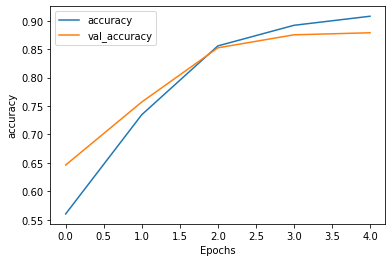

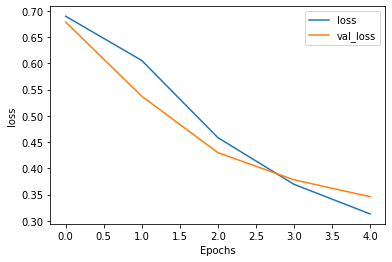

In [31]:
import matplotlib.pyplot as plt

def plot_g(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string,'val_'+string])
  plt.show()


plot_g(history,"accuracy")
plot_g(history,'loss')